# Facial Expression Recognition using CNN (Image Folder Version)
This notebook uses a folder-based FER-2013 dataset with a convolutional neural network (CNN) to classify facial expressions.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:

train_dir = 'archive/train'
test_dir = 'archive/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/amanueltenaw/.pyenv/versions/3.9.9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 553,575 (2.11 MB)

 Trainable params: 553,127 (2.11 MB)

 Non-trainable params: 448 (1.75 KB)

In [4]:

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25


/Users/amanueltenaw/.pyenv/versions/3.9.9/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 308ms/step - accuracy: 0.2210 - loss: 2.0210 - val_accuracy: 0.2534 - val_loss: 1.7931
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 315ms/step - accuracy: 0.3321 - loss: 1.6783 - val_accuracy: 0.4097 - val_loss: 1.5057
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 317ms/step - accuracy: 0.3968 - loss: 1.5476 - val_accuracy: 0.4461 - val_loss: 1.4464
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 313ms/step - accuracy: 0.4412 - loss: 1.4510 - val_accuracy: 0.4494 - val_loss: 1.4368
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 316ms/step - accuracy: 0.4686 - loss: 1.4027 - val_accuracy: 0.4164 - val_loss: 1.5231
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 318ms/step - accuracy: 0.4855 - loss: 1.3525 - val_accuracy: 0.5223 - val_loss: 1.2382
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 144s 321ms/step - accuracy: 0.5033 - loss: 1.3220 - val_accuracy: 0.4774 - val_loss: 1.3347
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 148s 329ms/step - accuracy: 0.5113 - loss: 1.28

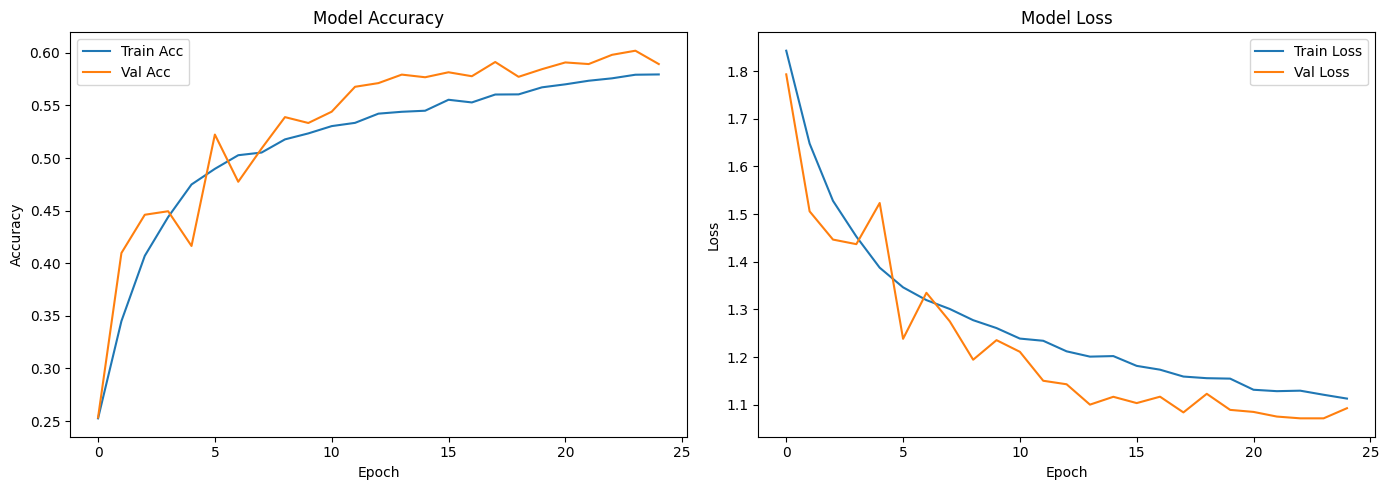

In [5]:

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step


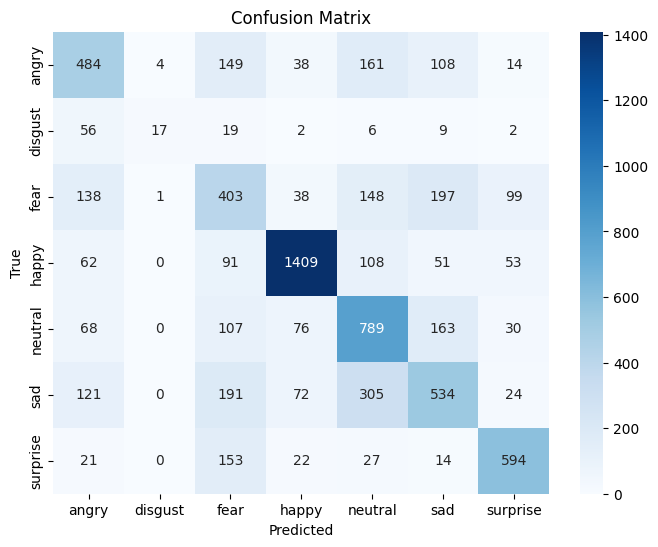

              precision    recall  f1-score   support

       angry       0.51      0.51      0.51       958
     disgust       0.77      0.15      0.26       111
        fear       0.36      0.39      0.38      1024
       happy       0.85      0.79      0.82      1774
     neutral       0.51      0.64      0.57      1233
         sad       0.50      0.43      0.46      1247
    surprise       0.73      0.71      0.72       831

    accuracy                           0.59      7178
   macro avg       0.60      0.52      0.53      7178
weighted avg       0.60      0.59      0.59      7178



In [6]:

import numpy as np
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

In [7]:

model.save("emotion_model.h5")
print("Model saved as emotion_model.h5")


Model saved as emotion_model.h5


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [9]:

model = load_model("emotion_model.h5")

In [10]:

img_path = "your_image.jpg"  
img = image.load_img(img_path, color_mode="grayscale", target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

In [11]:

emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
pred = model.predict(img_array)
predicted_class = emotion_classes[np.argmax(pred)]
print("Predicted Emotion:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted Emotion: happy


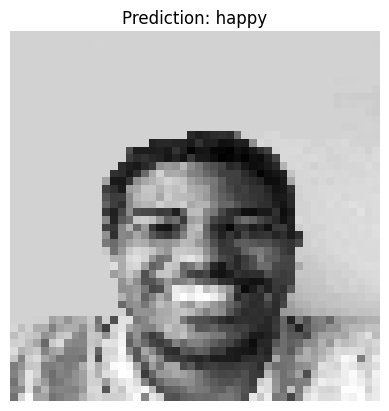

In [12]:
plt.imshow(img, cmap="gray")
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")
plt.show()